# Measuring Gravity using a Simple Pendulum

*Using http://www.kbcc.cuny.edu/academicdepartments/physci/science25/Documents/Exp_2.pdf*

In [2]:
#import required packages for coding
import numpy as np
import matplotlib.pyplot as plt


# Introduction and Background

In this work we will be investigating a simple harmonic oscillator.
A simple harmonic oscillator is neither driven nor damped and can be described using $F = -kx$ where $k$ is a constant.

This can be solved to give a solution of $x(t) = A\cos(\omega t + \phi)$ where $\omega = \sqrt{\frac{k}{m}}$.


A simple pendulum is one where the restoring force is provided by gravity which on Earth is 9.81 $ms^{-1}$.

The period $T$ of a simple pendulum in seconds is given by $T = 2\pi\sqrt{\frac{L}{g}}$ where $L$ is the length of the pendulum in metres and $g$ is the acceleration due to gravity in metres per second squared.

This means that by measuring the period of oscillation, a value for the acceleration due to gravity can be found.


# Planning

To begin with the equipment will be set up as shown in the diagram below.

<img src="https://www.webassign.net/question_assets/ncsucalcphysmechl3/lab_7_1/images/shmfig7.png" width="400"/>


First, the length of the string and the mass on the end will be kept constant and the time taken for 10 swings (to and from the same point) will be measured using a stop watch. This measurement will be repeated eight times.

This will be analysed using a rearrangment of the equation above to find the value of $g$:

$g = \frac{4\pi^2L}{T^2}$

Second, the length of the pendulum will be varied and the period will be measured, taking 3 repeats at each length. A plot will then be made of $L$ against $T^2$ where the gradient is equivalent to $\frac{g}{4\pi^2}$.

Finally, human reaction time will be measured in order to take this into account as an error on the time period measurement. Reaction time will be measured using an online tool (https://humanbenchmark.com/tests/reactiontime) and eight repeats will be taken.

# Experimental Results

## Measuring the acceleration due to gravity

In [3]:
# This is where the data recorded can be put

length = 0.4 #The length of the pendulum in metres
T = np.array([12.55, 12.90, 12.80, 12.50, 12.35, 12.60, 12.90, 12.10]) #The time taken for 10 swings - 8 repeats
mass = 1 #The mass of the pendulum in kg


In [4]:
# Analysis of the data

T_0 = T / 10
T_mean = np.mean(T_0)
error_T = np.std(T_0)

print(T_mean, error_T) # The mean value for a single oscillation and the error on this value

1.25875 0.026070817018267797


In [5]:
# From this, the value of g can be found using the equation in the planning

g = (4*(np.pi**2)*length)/(T_mean**2)

# We can also find the error on g

g_large = (4*(np.pi**2)*length)/((T_mean-error_T)**2)

# Print out the value with error

print('{:.2f}, {:.2f}'.format(g, g_large-g))

9.97, 0.43


## Dependence of T on L

In this section we will change the length of the pendulum and measure the period.

In [6]:
L = np.array([0.4, 0.6, 0.8, 1.0, 1.2]) #an array of the different lengths used

T_length = np.array([[12.50, 12.35, 12.60], [15.60, 15.95, 15.25], [17.90, 17.30, 18.50], [20.10, 20.45, 19.85], [21.90, 21.70, 22.10]]) #an array of arrays for the time taken for 10 oscillations - 3 repeats of each length

In [7]:
T_length_mean = T_length.mean(axis=1)

In [8]:
T_length_mean

array([12.48333333, 15.6       , 17.9       , 20.13333333, 21.9       ])

Text(0, 0.5, 'Oscillation time squared, $s^2$')

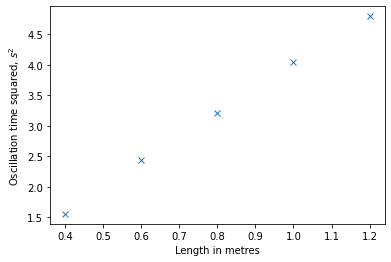

In [9]:
#plot the data

plt.plot(L, (T_length_mean/10)**2, 'x')
plt.xlabel('Length in metres')
plt.ylabel('Oscillation time squared, $s^2$')


The line of best fit has an intercept of -0.03 ± 0.05 and a gradient of 4.05 ± 0.06


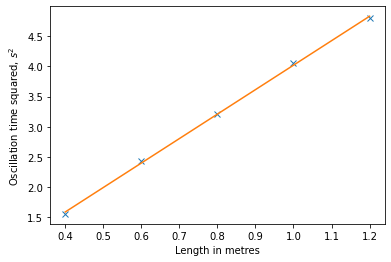

In [10]:
#Using the equation in planning, we can find g from these values

coef, errs = np.polyfit(L, (T_length_mean/10)**2, 1, cov=True)
m = coef[0]
c = coef[1]
m_err = np.sqrt(errs[0,0]) # the diagonal of the covariance matrix `errs` contains the variance (deviation squared) of for each coefficient
c_err = np.sqrt(errs[1,1])

plt.plot(L, (T_length_mean/10)**2, 'x')
plt.xlabel('Length in metres')
plt.ylabel('Oscillation time squared, $s^2$')
plt.plot(L, m*L + c)

#print(m)
print('The line of best fit has an intercept of {:.2f} ± {:.2f} and a gradient of {:.2f} ± {:.2f}'.format(c, c_err, m, m_err))

As we have plotted $L$ against $T^2$, the gradient is $\frac{g}{4\pi^2}$ so g is found to be 

In [11]:
g_length = (4*np.pi**2)/m
g_length_err = g_length - ((4*np.pi**2) / (m + m_err))
print('g is {:.2f} ± {:.2f} m/s'.format(g_length, g_length_err))


g is 9.75 ± 0.14 m/s


## Measuring Reaction Time

In this section I will measure reaction time using https://humanbenchmark.com/tests/reactiontime to find the human error on the time measurement above.

In [12]:
reaction_time = np.array([417, 364, 396, 422, 383, 333, 348, 363]) # reaction time in ms, repeated 8 times

mean_reaction_time = np.mean(reaction_time)

error_reaction_time = np.std(reaction_time)

print('{:.2f} ± {:.2f}s'.format(mean_reaction_time, error_reaction_time))

378.25 ± 29.90s


In [17]:
# Reaction time as a % of the time for 10 oscillations
R_time = mean_reaction_time / 1000

error_on_T = R_time / T *100

mean_error_on_T = np.mean(error_on_T)

print('The percentage error on the time measurement is {:.2f}%.'.format(mean_error_on_T))

The percentage error on the time measurement is 3.01%.


# Conclusions

In conclusion, we found the value of the acceleration due to gravity to be 10.0 ± 0.4 m/s in the first task and 9.8 ± 0.1 m/s in the second task. The errors and accuracy of these suggest that the second method was better.
...